# Chương 09. Object Recognition

- Trong chương này, chúng ta sẽ tìm hiểu về nhận dạng đối tượng và cách chúng ta có thể sử dụng nó để xây dựng một công cụ tìm kiếm trực quan. Chúng ta sẽ thảo luận về phát hiện đặc trưng, xây dựng các vectơ đặc trưng và sử dụng máy học (machine learning) để xây dựng trình phân loại. Chúng ta sẽ học cách sử dụng các khối (blocks) khác nhau này để xây dựng một hệ thống nhận dạng đối tượng.

## Đến cuối chương này, bạn sẽ biết:
- Sự khác biệt giữa phát hiện đối tượng và nhận dạng đối tượng
- What a dense feature detector is
- What a visual dictionary is
- Cách xây dựng một vectơ đặc trưng (How to built a feature vector ?)
- Học tập có giám sát và không giám sát là gì (What is the supervising learning and unsupervising learning) ?
- Support vector machine (SVM) là gì và cách sử dụng chúng để xây dựng bộ phân loại
- Làm thế nào để nhận ra một đối tượng trong một hình ảnh không xác định

## Nội dung:
1. **Object detection versus object recognition**
2. **What is a dense feature detector?**
3. **What is a visual dictionary ?**
4. **What is supervised and unsupervised learning?**
5. **What are support vector machines?**
6. **How do we actually implement this?**

## -------------------------------------------------------------------##-------------------------------------------------------------

## 1. Object detection versus object recognition

- Trước khi chúng ta tiến hành, chúng ta cần hiểu những gì chúng ta sẽ thảo luận trong chương này. Bạn phải thường xuyên nghe các thuật ngữ **object detection (phát hiện đối tượng)** và **object recognition(nhận dạng đối tượng)**, và chúng thường bị nhầm là cùng một điều. Có một sự khác biệt rất rõ ràng giữa hai.

- Object detection (phát hiện đối tượng) đề cập đến việc phát hiện sự hiện diện của một đối tượng cụ thể trong một cảnh cụ thể. 
- Chúng ta không biết đối tượng có thể là gì. Chẳng hạn, chúng ta đã thảo luận về phát hiện khuôn mặt trong Chương 4, Detecting and Tracking Different Body Parts (phát hiện và theo dõi các bộ phận cơ thể khác nhau).
- Trong quá trình thảo luận ở chương 4, chúng ta chỉ phát hiện xem một khuôn mặt có xuất hiện trong hình ảnh đã cho hay không. Chúng ta đã không nhận diện (recognize) ra người!
- Lý do chúng ta không nhận ra người đó là vì chúng ta không quan tâm đến điều đó trong cuộc lúc đó. Mục tiêu của chúng ta là tìm vị trí của khuôn mặt trong hình ảnh đã cho.
- Các hệ thống nhận diện khuôn mặt có tính thương mại (Commercial face regnonition systems) sử dụng cả nhận diện khuôn mặt (face recognition) và phát hiện khuôn mặt (face detection) để nhận dạng một người.
- Đầu tiên, chúng ta cần xác định vị trí khuôn mặt, và sau đó chạy bộ nhận diện khuôn mặt trên khuôn mặt bị cắt.

- Object recognition (Nhận dạng đối tượng) là quá trình xác định một đối tượng trong một hình ảnh nhất định. Chẳng hạn, một hệ thống nhận dạng đối tượng có thể cho bạn biết nếu một hình ảnh nhất định có chứa một chiếc váy hoặc một đôi giày. 
- Trên thực tế, chúng ta có thể training một **hệ thống nhận dạng đối tượng (Object Recognition System)** để xác định nhiều đối tượng khác nhau. Vấn đề là nhận dạng đối tượng là một vấn đề thực sự khó giải quyết.
- Nó đã "trốn tránh" các nhà nghiên cứu thị giác máy tính trong nhiều thập kỷ nay và đã trở thành `holy grail` của thị giác máy tính. 
- Con người có thể xác định rất nhiều đối tượng rất dễ dàng. Chúng ta làm điều đó mỗi ngày và chúng ta làm điều đó một cách dễ dàng, nhưng máy tính không thể làm điều đó với độ chính xác đó.

- Hãy xem xét hình ảnh sau đây của một cốc latte:

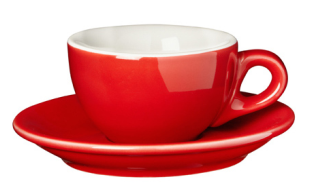

- Một **object detetor** sẽ cung cấp cho bạn các thông tin sau:

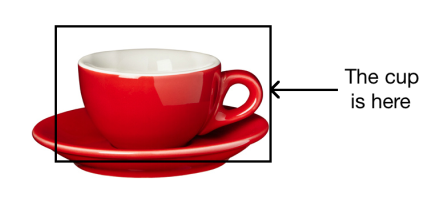

- Bây giờ, hãy xem xét hình ảnh sau đây của một tách trà:

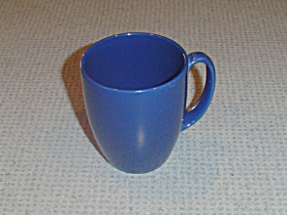

- Nếu bạn chạy nó thông qua một **object detector**, bạn sẽ thấy kết quả sau:

- Như bạn có thể thấy, Object Detector phát hiện sự hiện diện của tách trà, nhưng không có gì hơn thế. Nếu bạn huấn luyện một **Object Recognizer**, nó sẽ cung cấp cho bạn các thông tin sau, như thể hiện trong hình ảnh sau:

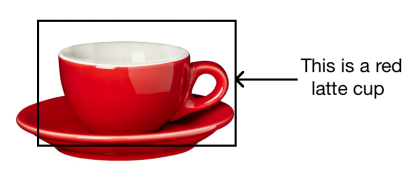

- Nếu bạn xem xét hình ảnh thứ hai, nó sẽ cung cấp cho bạn thông tin sau:

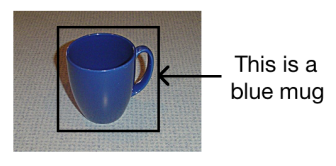

- Như bạn có thể thấy, một bộ nhận diện đối tượng(Object Recognizer) hoàn hảo sẽ cung cấp cho bạn tất cả thông tin liên quan đến đối tượng đó. Một bộ nhận dạng đối tượng (Object Detector) hoạt động chính xác hơn nếu nó biết vị trí của đối tượng. 
- Nếu bạn có một hình ảnh lớn và chiếc cốc là một phần nhỏ của nó, thì bộ nhận dạng đối tượng (Object Recognizer) có thể không thể nhận ra nó. Do đó, bước đầu tiên là **phát hiện đối tượng** và **lấy bounding box**. Khi chúng ta có điều đó, chúng ta có thể chạy một bộ nhận dạng đối tượng (Object Regnonizer) để trích xuất thêm thông tin.

## 2. What is a dense feature detector?

- Để trích xuất một lượng thông tin có ý nghĩa từ các hình ảnh, chúng tôi cần đảm bảo rằng **feature extractor** của chúng ta trích xuất các đặc trưng từ tất cả các phần của một hình ảnh nhất định. Hãy xem xét hình ảnh sau đây:

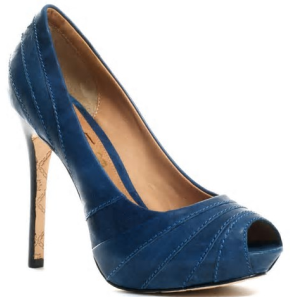

- Nếu bạn trích xuất các tính năng bằng feature extractor như chúng ta đã làm trong Chương 5. Extracting Features from an Image(Trích xuất các tính năng từ một hình ảnh), nó sẽ trông như thế này:

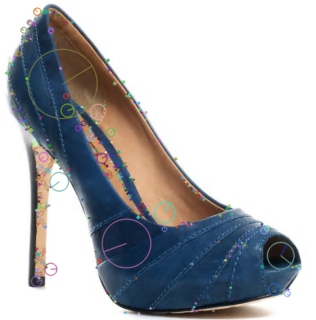

- Thật không may, nếu bạn đã từng sử dụng detector **cv2.FeaturetureDetector_create ("Mật độ")**, thật không may, đã bị xóa khỏi OpenCV 3.2 trở đi, vì vậy chúng tôi sẽ cần phải thực hiện một bước lặp riêng của chúng ta trên lưới và lấy các điểm chính:

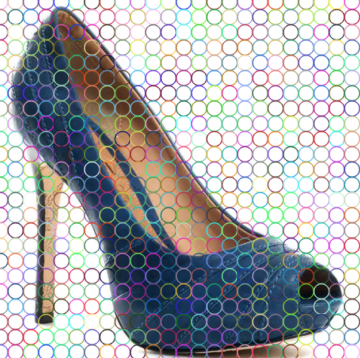

- Chúng tôi có thể kiểm soát mật độ là tốt. Hãy làm cho nó thưa thớt:

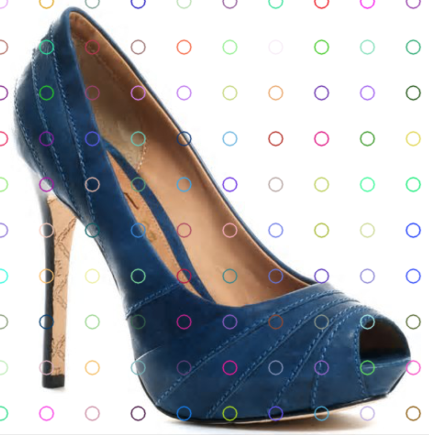

- Bằng cách này, chúng ta có thể đảm bảo rằng mọi phần trong ảnh đều được xử lý. Đây là code để làm điều đó:

In [1]:
import sys
import cv2
import numpy as np

class DenseDetector():
    def __init__(self, step_size=20, feature_scale=20, img_bound=20):
        # Create a dense feature detector
        self.initXyStep = step_size
        self.initFeatureScale = feature_scale
        self.initImgBound = img_bound
    def detect(self, img):
        keypoints = []
        rows, cols = img.shape[:2]
        for x in range(self.initImgBound, rows, self.initFeatureScale):
            for y in range(self.initImgBound, cols, self.initFeatureScale):
                keypoints.append(cv2.KeyPoint(float(x), float(y), self.initXyStep))
        return keypoints

class SIFTDetector():
    def __init__(self):
        self.detector = cv2.xfeatures2d.SIFT_create()
        
    def detect(self, img):
        # Convert to grayscale
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Detect keypoints using SIFT
        return self.detector.detect(gray_image, None)
    
if __name__=='__main__':
    input_image = cv2.imread('high_heels.jpg')
    input_image_dense = np.copy(input_image)
    input_image_sift = np.copy(input_image)
    
    keypoints = DenseDetector(20,20,5).detect(input_image)
    # Draw keypoints on top of the input image
    input_image_dense = cv2.drawKeypoints(input_image_dense, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Display the output image
    cv2.imshow('Dense feature detector', input_image_dense)
    
    keypoints = SIFTDetector().detect(input_image)
    # Draw SIFT keypoints on the input image
    input_image_sift = cv2.drawKeypoints(input_image_sift, keypoint,None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Display the output image
    cv2.imshow('SIFT detector', input_image_sift)
    
    # Wait until user presses a key
    cv2.waitKey()

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

- Điều này cho phép chúng ta kiểm soát chặt chẽ lượng thông tin được trích xuất.
- Khi chúng ta sử dụng SIFT detector, một số phần của hình ảnh bị bỏ qua. Điều này hoạt động tốt khi chúng ta đang xử lý việc phát hiện các đặc trưng nổi bật (prominent features), nhưng khi chúng ta đang xây dựng một bộ nhận dạng đối tượng (object recognizer), chúng ta cần đánh giá tất cả các phần của hình ảnh. Do đó, chúng ta sử dụng một dense detector (máy dò dày đặc) và sau đó trích xuất các đặc trưng từ các điểm chính đó.

## 3. What is a visual dictionary?

- Chúng ta sẽ sử dụng mô hình Bag of Words để xây dựng trình nhận dạng đối tượng của chúng ta. Mỗi hình ảnh được thể hiện dưới dạng biểu đồ (histogram) của các từ trực quan. 
- Những từ trực quan này về cơ bản là N centroid được xây dựng bằng cách sử dụng tất cả các điểm chính được trích xuất từ hình ảnh huấn luyện. Quá trình diễn ra như sau:

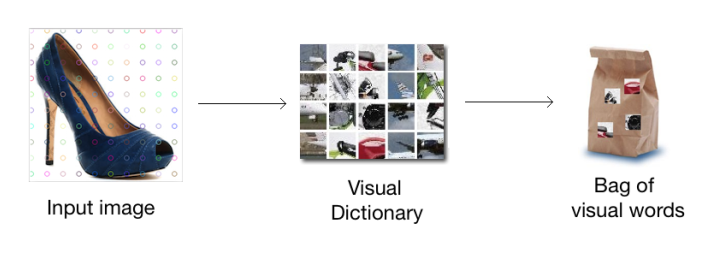

- Từ mỗi hình ảnh huấn luyện (trong ngữ cảnh này thì 1 ảnh là 1 datapoint), chúng ta phát hiện một tập hợp các điểm chính (set of keypoints) và trích xuất các đặc trưng cho từng điểm chính (keypoint) đó. Mỗi hình ảnh sẽ tạo ra một số điểm chính khác nhau. Để huấn luyện một bộ phân loại, mỗi hình ảnh phải được biểu diễn bằng một vectơ đặc trưng có độ dài cố định. Vectơ đặc trưng này chỉ đơn thuần là một biểu đồ, trong đó mỗi thùng tương ứng với một từ trực quan.

- Khi chúng ta trích xuất tất cả các tính năng từ tất cả các điểm chính trong hình ảnh đào tạo, chúng ta thực hiện phân cụm K-mean và trích xuất N centroid. 
- N có nghĩa là chiều dài của vectơ đặc trưng của một hình ảnh cụ thể. 
- Mỗi hình ảnh bây giờ sẽ được biểu diễn dưới dạng histogram (biểu đồ), trong đó mỗi bin tương ứng với một trong các N centroid.
- Để đơn giản, giả sử $N = 4$. Bây giờ, trong một hình ảnh nhất định, chúng tôi trích xuất K điểm chính.
- Trong số $K$ điểm chính này, một trong số chúng sẽ gần với centroid đầu tiên, một trong số chúng sẽ gần với centroid thứ hai, v.v. Vì vậy, chúng ta xây dựng một biểu đồ dựa trên trọng tâm gần nhất (closest centroid) với từng điểm chính (keypoint). Biểu đồ này trở thành vector đặc trưng của chúng ta. Quá trình này được gọi là **vector quantization**.

- Để hiểu **vector quantization**, hãy xem xét một ví dụ. Giả sử chúng ta có một hình ảnh và chúng tôi đã trích xuất một số điểm đặc trưng nhất định từ nó. Bây giờ, mục tiêu của chúng ta là thể hiện hình ảnh này dưới dạng một vectơ đặc trưng. Hãy xem xét hình ảnh sau đây:

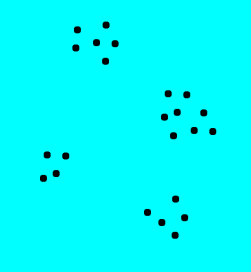

- Như bạn có thể thấy, chúng ta có bốn centroid. Hãy nhớ rằng các điểm được hiển thị trong các hình thể hiện không gian đặc trưng và không phải là các vị trí hình học thực tế của các điểm đặc trưng đó trong hình ảnh. Nó được hiển thị theo cách này trong hình trước để dễ hình dung.
- Các điểm từ nhiều vị trí hình học khác nhau trong một hình ảnh có thể gần nhau trong không gian đặc trưng. Mục tiêu của chúng ta là thể hiện hình ảnh này dưới dạng biểu đồ (histogram), trong đó mỗi bin tương ứng với một trong những centroid này.
- Bằng cách này, cho dù chúng ta trích xuất bao nhiêu điểm đặc trưng từ một hình ảnh, nó sẽ luôn được chuyển đổi thành một vectơ đặc trưng có độ dài cố định. Vì vậy, chúng ta làm tròn từng điểm đặc trưng đến trọng tâm gần nhất của nó, thể hiện trong hình ảnh sau:

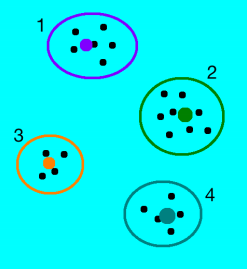

- Nếu bạn xây dựng biểu đồ cho hình ảnh này, nó sẽ trông như thế này:

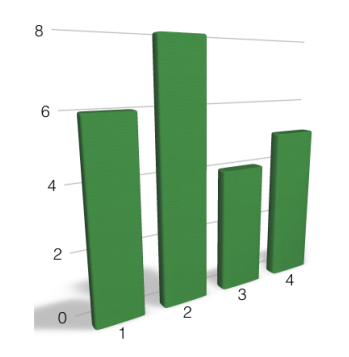

- Bây giờ, nếu bạn xem xét một hình ảnh khác với sự phân bố các điểm đặc trưng khác nhau, nó sẽ trông như thế này:

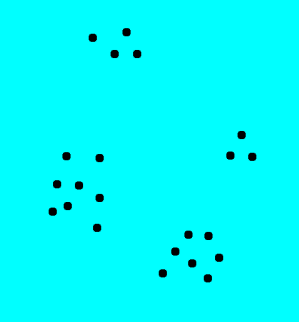

- Các cụm sẽ như sau:

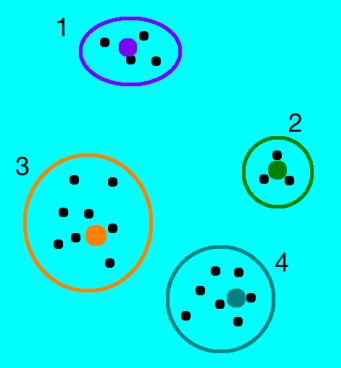

- Biểu đồ cho hình ảnh mới sẽ như vầy nè:

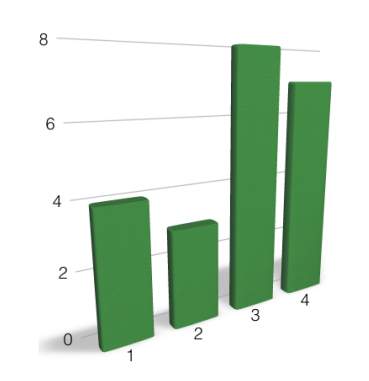

- Như bạn có thể thấy, biểu đồ rất khác nhau cho hai hình ảnh mặc dù các điểm dường như được phân phối ngẫu nhiên. Đây là một kỹ thuật rất mạnh và nó được sử dụng rộng rãi trong xử lý tín hiệu và thị giác máy tính.
- Có nhiều cách khác nhau để làm điều này và độ chính xác phụ thuộc vào mức độ chi tiết mà bạn muốn. Nếu bạn tăng số lượng centroid, bạn có thể thể hiện hình ảnh tốt hơn, do đó làm tăng tính "độc đáo" của vectơ đặc trưng của bạn. 
- Phải nói rằng, điều quan trọng cần đề cập là bạn không thể cứ tăng số lượng centroid hoài được (không phải muốn là được đâu). Nếu bạn làm điều đó, nó sẽ trở nên quá phức tạp và mất đi tính hiệu quả của nó.

## 4.  What is supervised and unsupervised learning?

- Nếu bạn đã quen thuộc với những kiến thức cơ bản của machine learning, bạn chắc chắn sẽ biết: học tập có giám sát (supervised learning) và không giám sát (unsupervised learning) là gì.
- **Học có giám sát (supervised learning)** ám chỉ đến việc xây dựng một hàm (hàm số toán học) dựa trên các mẫu được dán nhãn (labeled samples). 
- Ví dụ: nếu chúng ta đang xây dựng một hệ thống để tách hình ảnh trang phục khỏi hình ảnh giày dép, trước tiên chúng ta cần xây dựng cơ sở dữ liệu và gắn nhãn cho nó. Chúng ta cần nói với thuật toán của mình những hình ảnh tương ứng với trang phục và những hình ảnh tương ứng với giày dép. Dựa trên dữ liệu này, thuật toán sẽ tìm hiểu cách xác định trang phục và giày dép để khi một hình ảnh không xác định xuất hiện, nó có thể nhận ra những gì bên trong hình ảnh đó.

- **Học tập không giám sát (unsupervised learning)** trái ngược với những gì chúng ta vừa thảo luận. Không có dữ liệu được dán nhãn ở đây.
- Giả sử chúng ta có một loạt các hình ảnh và chúng ta chỉ muốn tách chúng thành ba nhóm. Chúng ta không biết tiêu chí là gì. Vì vậy, một thuật toán học không giám sát sẽ cố gắng tách tập hợp dữ liệu đã cho thành ba nhóm theo cách tốt nhất có thể. Lý do chúng ta đang thảo luận về điều này là vì chúng ta sẽ sử dụng kết hợp việc học có giám sát và không giám sát để xây dựng hệ thống nhận dạng đối tượng của chúng ta.

- Đọc thêm các thuật toán machine learning: https://machinelearningcoban.com/2016/12/27/categories/

## 5. What are support vector machines?

- **Support vector machine (SVM)** là các mô hình học tập có giám sát rất phổ biến trong lĩnh vực máy học. Các SVM thực sự giỏi trong việc phân tích dữ liệu được dán nhãn và phát hiện các mẫu. Đưa ra một loạt các điểm dữ liệu và các nhãn liên quan, các SVM sẽ xây dựng các **hyperplane (đường thẳng, mặt phẳng, siêu phẳng)** tách biệt theo cách tốt nhất có thể.

- Đợi một chút, hyperplanes là gì? Để hiểu điều đó, hãy xem xét hình sau:

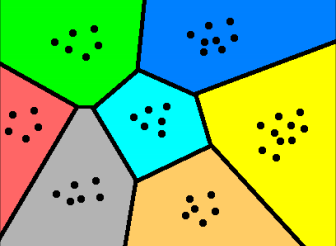

- Như bạn có thể thấy, các điểm đang được phân tách bằng các ranh giới đường thẳng tương đương với các điểm.
- Điều này là dễ dàng để hình dung trong hai chiều. Nếu nó có ba chiều, các dải phân cách sẽ là các mặt phẳng.
- Khi chúng ta xây dựng các đặc trưng cho hình ảnh, độ dài của các vectơ đặc trưng thường nằm trong phạm vi sáu chữ số. Vì vậy, khi chúng ta đi đến một không gian có chiều cao như vậy, tương đương với các dòng sẽ là siêu phẳng.
- Khi các siêu phẳng được tạo thành, chúng ta sử dụng mô hình toán học này để phân loại dữ liệu chưa biết, dựa trên vị trí của nó trên bản đồ này.

### Điều gì xảy ra nếu chúng ta không thể tách dữ liệu một cách đơn giản những đường thẳng?

- Có một thứ gọi là **kernel trick** mà chúng ta sử dụng trong các SVM. Hãy xem xét hình ảnh sau đây:

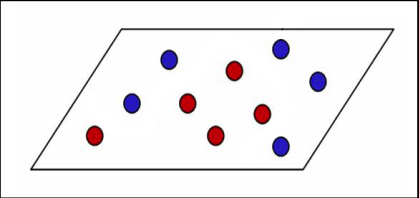

- Như chúng ta có thể thấy, chúng ta không thể vẽ một đường thẳng đơn giản để tách các điểm đỏ khỏi các điểm màu xanh. Đến với một ranh giới cong đẹp sẽ đáp ứng tất cả các điểm là rất tốn kém. SVM thực sự giỏi trong việc vẽ các đường thẳng. Vì vậy, câu trả lời của chúng tôi ở đây là gì? Điểm hay của SVM là chúng có thể vẽ các đường thẳng này theo bất kỳ số lượng kích thước nào. Vì vậy, về mặt kỹ thuật, nếu bạn chiếu các điểm này vào một không gian có chiều cao, nơi chúng có thể được phân tách bằng một siêu phẳng đơn giản, các SVM sẽ đưa ra một ranh giới chính xác. Khi chúng ta có ranh giới đó, chúng ta có thể chiếu nó trở lại không gian ban đầu. Hình chiếu của siêu phẳng này trên không gian chiều thấp hơn ban đầu của chúng ta trông cong, như chúng ta có thể thấy trong hình sau:

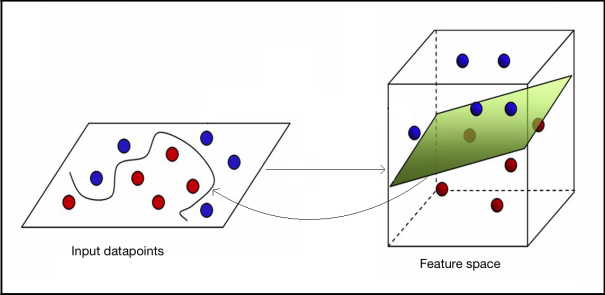

- Chủ đề của SVM rất sâu sắc và chúng ta sẽ không thể thảo luận chi tiết ở đây. Nếu bạn thực sự quan tâm, có rất nhiều tài liệu có sẵn trực tuyến. Bạn có thể đi qua một hướng dẫn đơn giản để hiểu nó tốt hơn. Ngoài ra tài liệu chính thức của OpenCV chứa một số ví dụ để hiểu rõ hơn: https://docs.opencv.org/3.0-beta/modules/ml/doc/support_vector_machines.html

## 6. How do we actually implement this?

- Bây giờ chúng ta đã đến cốt lõi. Phần giới thiệu bên trên là cần thiết bởi vì nó cung cấp cho bạn nền tảng để xây dựng một hệ thống phát hiện và nhận dạng đối tượng (object detection and object recognition system).
- Bây giờ, hãy xây dựng một Object Recognizer có thể nhận ra liệu hình ảnh đã cho có chứa một chiếc váy, một đôi giày hay một chiếc túi. Chúng tôi có thể dễ dàng mở rộng hệ thống này để phát hiện bất kỳ số lượng mặt hàng. Chúng tôi đang bắt đầu với ba mục riêng biệt để bạn có thể bắt đầu thử nghiệm với nó sau này.

- Trước khi bắt đầu, chúng ta cần đảm bảo rằng chúng ta có một bộ dữ liệu huấn luyên (training data). Có nhiều cơ sở dữ liệu trực tuyến có sẵn, trong đó các hình ảnh đã được sắp xếp thành các nhóm.
- **Caltech256** có lẽ là một trong những cơ sở dữ liệu phổ biến nhất để nhận dạng đối tượng. Bạn có thể tải xuống từ http://www.vision.caltech.edu/Image_Datasets/Caltech256. 
- Tạo một thư mục có tên là hình ảnh và tạo ba thư mục con bên trong nó, đó là trang phục, giày dép và túi xách. Trong mỗi thư mục con đó, thêm 20 hình ảnh tương ứng với mục đó. Bạn chỉ có thể tải xuống những hình ảnh này từ internet, nhưng hãy chắc chắn rằng những hình ảnh đó có nền rõ ràng.

- Ví dụ, một hình ảnh trang phục sẽ như thế này:

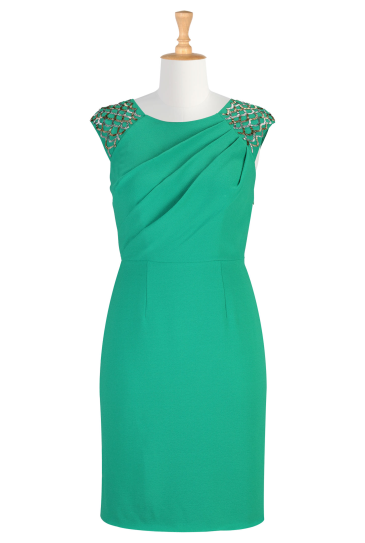

- Một hình ảnh giày dép sẽ trông như thế này:

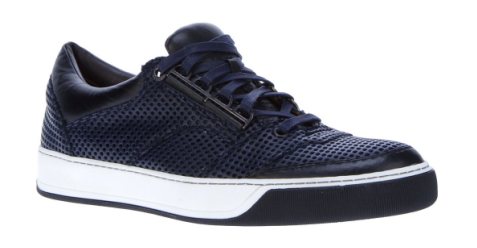

- Hình ảnh về balo sẽ như vầy:

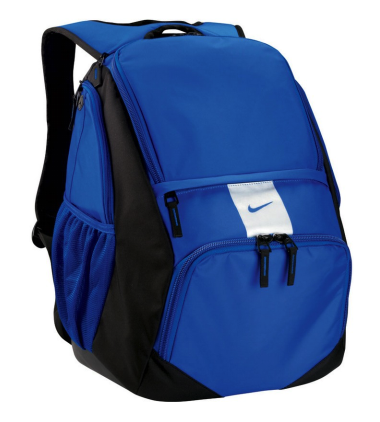

- Bây giờ chúng ta có 60 training images, chúng ta đã sẵn sàng để bắt đầu. Một lưu ý phụ, hệ thống nhận dạng đối tượng thực sự cần hàng chục ngàn hình ảnh huấn luyện để hoạt động tốt trong thế giới thực.
- Vì chúng ta đang xây dựng một trình nhận dạng đối tượng để phát hiện ba loại đối tượng, chúng tôi sẽ chỉ mất 20 hình ảnh huấn luyện cho mỗi đối tượng. Thêm nhiều hình ảnh huấn luyện sẽ tăng độ chính xác và tốc độ của hệ thống.

- Bước đầu tiên ở đây là trích xuất các vectơ đặc trưng từ tất cả các hình ảnh đào tạo và xây dựng từ điển trực quan (còn được gọi là codebook).

- Đầu tiên, sử dụng lại lớp **DenseDetector** trước đây của chúng ta, cộng với trình phát hiện tính năng SIFT:

In [2]:
class SIFTExtractor():
    def __init__(self):
        self.extractor = cv2.xfeatures2d.SIFT_create()
        
    def compute(self, image, kps):
        if image is None:
            print("Not a valid image")
            raise TypeError
            
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kps, des = self.extractor.detectAndCompute(gray_image, None)
        return kps, des

- Sau đó, lớp Quantizer của chúng ta tính toán vector quatization và xây dựng vector đặc trưng:

In [3]:
from sklearn.cluster import KMeans

# Vector quantization
class Quantizer(object):
    def __init__(self, num_clusters=32):
        self.num_dims = 128
        self.extractor = SIFTExtractor()
        self.num_clusters = num_clusters
        self.num_retries = 10
    
    def quantize(self, datapoints):
        # Create KMeans object
        kmeans = KMeans(self.num_clusters,
        n_init=max(self.num_retries, 1),
        max_iter=10, tol=1.0)
        
        # Run KMeans on the datapoints
        res = kmeans.fit(datapoints)
        
        # Extract the centroids of those clusters
        centroids = res.cluster_centers_
        return kmeans, centroids
    
    def normalize(self, input_data):
        sum_input = np.sum(input_data)
        if sum_input > 0:
            return input_data / sum_input
        else:
            return input_data
    
    # Extract feature vector from the image
    def get_feature_vector(self, img, kmeans, centroids):
        kps = DenseDetector().detect(img)
        kps, fvs = self.extractor.compute(img, kps)
        labels = kmeans.predict(fvs)
        fv = np.zeros(self.num_clusters)
        
        for i, item in enumerate(fvs):
            fv[labels[i]] += 1
            
        fv_image = np.reshape(fv, ((1, fv.shape[0])))
        return self.normalize(fv_image)

- Sử dụng lại các triển khai trước đó, một lớp bắt buộc khác sẽ là lớp **FeatureExtractor**, được thiết kế để trích xuất các centroids của từng hình ảnh:

In [4]:
class FeatureExtractor(object):
    def extract_image_features(self, img):
        # Dense feature detector
        kps = DenseDetector().detect(img)
        
        # SIFT feature extractor
        kps, fvs = SIFTExtractor().compute(img, kps)
        return fvs
    
    # Extract the centroids from the feature points
    def get_centroids(self, input_map, num_samples_to_fit=10):
        kps_all = []
        count = 0
        cur_label = ''
        for item in input_map:
            if count >= num_samples_to_fit:
                if cur_label != item['label']:
                    count = 0
                else:
                    continue
            count += 1
            
            if count == num_samples_to_fit:
                print("Built centroids for", item['label'])
                
            cur_label = item['label']
            img = cv2.imread(item['image'])
            img = resize_to_size(img, 150)
            
            num_dims = 128
            fvs = self.extract_image_features(img)
            kps_all.extend(fvs)
            
        kmeans, centroids = Quantizer().quantize(kps_all)
        return kmeans, centroids
    
    
        def get_feature_vector(self, img, kmeans, centroids):
            return Quantizer().get_feature_vector(img, kmeans, centroids)

- Kịch bản sau đây sẽ cung cấp cho chúng tôi một từ điển các đặc trưng để phân loại hình ảnh trong tương lai:

In [5]:
########################
# create_features.py
########################
import os
import sys
import argparse
import json

import cv2
import numpy as np

import _pickle as pickle

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Creates features for given images')
    parser.add_argument("--samples", dest="cls", nargs="+", action="append", required=True, help="Folders containing the training images.\nThe first element needs to be the class label.")
    parser.add_argument("--codebook-file", dest='codebook_file', required=True, help="Base file name to store the codebook")
    parser.add_argument("--feature-map-file", dest='feature_map_file', required=True, help="Base file name to store the feature map")
    return parser

# Loading the images from the input folder
def load_input_map(label, input_folder):
    combined_data = []
    
    if not os.path.isdir(input_folder):
        raise IOError("The folder " + input_folder + " doesn't exist")
        
    # Parse the input folder and assign the labels
    for root, dirs, files in os.walk(input_folder):
        for filename in (x for x in files if x.endswith('.jpg')):
            combined_data.append({'label': label, 'image':
            os.path.join(root, filename)})
            
    return combined_data

def extract_feature_map(input_map, kmeans, centroids):
    feature_map = []
    
    for item in input_map:
        temp_dict = {}
        temp_dict['label'] = item['label']
        
        print("Extracting features for", item['image'])
        img = cv2.imread(item['image'])
        img = resize_to_size(img, 150)
        
        temp_dict['feature_vector'] = FeatureExtractor().get_feature_vector(img, kmeans, centroids)
        
        if temp_dict['feature_vector'] is not None:
            feature_map.append(temp_dict)
            
    return feature_map

# Resize the shorter dimension to 'new_size'
# while maintaining the aspect ratio
def resize_to_size(input_image, new_size=150):
    h, w = input_image.shape[0], input_image.shape[1]
    ds_factor = new_size / float(h)
    
    if w < h:
        ds_factor = new_size / float(w)
        
    new_size = (int(w * ds_factor), int(h * ds_factor))
    return cv2.resize(input_image, new_size)

if __name__=='__main__':
    args = build_arg_parser().parse_args()

    input_map = []
    for cls in args.cls:
        assert len(cls) >= 2, "Format for classes is `<label> file`"
        label = cls[0]
        input_map += load_input_map(label, cls[1])
        
    # Building the codebook
    print("===== Building codebook =====")
    kmeans, centroids = FeatureExtractor().get_centroids(input_map)
    if args.codebook_file:
        with open(args.codebook_file, 'wb') as f:
            print('kmeans', kmeans)
            print('centroids', centroids)
            pickle.dump((kmeans, centroids), f)
            
    # Input data and labels
    print("===== Building feature map =====")
    feature_map = extract_feature_map(input_map, kmeans, centroids)
    if args.feature_map_file:
        with open(args.feature_map_file, 'wb') as f:
            pickle.dump(feature_map, f)

usage: ipykernel_launcher.py [-h] --samples CLS [CLS ...] --codebook-file
                             CODEBOOK_FILE --feature-map-file FEATURE_MAP_FILE
ipykernel_launcher.py: error: the following arguments are required: --samples, --codebook-file, --feature-map-file


SystemExit: 2

/home/tien/anaconda3/envs/OpenCV_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### What happened inside the code?

- Điều đầu tiên chúng ta cần làm là trích xuất centroids. Đây là cách chúng ta sẽ xây dựng từ điển trực quan.
- Phương thức **get_centroids** trong lớp **FeatureExtractor** được thiết kế để làm điều này. Chúng ta tiếp tục thu thập các đặc trưng của hình ảnh hình ảnh được trích xuất từ các điểm chính (keypoints) cho đến khi chúng ta có đủ số lượng chúng.
- Vì chúng ta đang sử dụng một **máy dò dày đặc (dense detector)**, nên 10 hình ảnh là đủ. Lý do chúng ta chỉ chụp 10 bức ảnh là vì chúng sẽ tạo ra một số lượng lớn các đặc trưng. Các centroids sẽ không thay đổi nhiều ngay cả khi bạn thêm nhiều điểm đặc trưng.

- Khi chúng ta đã trích xuất các centroids, chúng ta đã sẵn sàng chuyển sang bước tiếp theo của trích xuất đặc trưng. Tập hợp các centroids là từ điển trực quan của chúng ta.
- Hàm **extract_feature_map**, sẽ **trích xuất một vectơ đặc trưng** từ **mỗi hình ảnh** và **liên kết nó với nhãn tương ứng**. Lý do chúng ta làm điều này là vì chúng ta cần ánh xạ này để **huán luyện recognizer** của chúng tôi.
- Chúng ta cần một tập hợp các điểm chính và mỗi điểm chính phải được liên kết với một nhãn. Vì vậy, chúng ta bắt đầu từ một hình ảnh, trích xuất vectơ đặc trưng và sau đó liên kết nó với nhãn tương ứng (chẳng hạn như bag, dress, footwear).

- Lớp **Quantizer** được thiết kế để đạt được lượng tử hóa vectơ và xây dựng vectơ đặc trưng. Đối với mỗi điểm chính được trích xuất từ hình ảnh, phương thức **get_feature_vector** tìm từ trực quan gần nhất trong từ điển của chúng ta.
- Bằng cách này, chúng ta kết thúc việc xây dựng một biểu đồ dựa trên từ điển trực quan của chúng ta.
- Mỗi hình ảnh bây giờ được thể hiện dưới dạng kết hợp từ một tập hợp các từ trực quan. Do đó có tên **Bag of Worlds (BoW)**.

- Bước tiếp theo là huấn luyện classifier sử dụng các đặc trưng này. Cho rằng chúng ta thực hiện một lớp khác:

In [6]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn import preprocessing

# To train the classifier
class ClassifierTrainer(object):
    def __init__(self, X, label_words):
        # Encoding the labels (words to numbers)
        self.le = preprocessing.LabelEncoder()
        
        # Initialize One versus One Classifier using a linear kernel
        self.clf = OneVsOneClassifier(LinearSVC(random_state=0))
        
        y = self._encodeLabels(label_words)
        X = np.asarray(X)
        self.clf.fit(X, y)
        
    # Predict the output class for the input datapoint
    def _fit(self, X):
        X = np.asarray(X)
        return self.clf.predict(X)
    
    # Encode the labels (convert words to numbers)
    def _encodeLabels(self, labels_words):
        self.le.fit(labels_words)
        return np.array(self.le.transform(labels_words), dtype=np.float32)
    
    # Classify the input datapoint
    def classify(self, X):
        labels_nums = self._fit(X)
        labels_words = self.le.inverse_transform([int(x) for x in labels_nums])
        return labels_words

- Bây giờ, dựa trên từ điển đặc trưng ở trên của chúng ta, chúng ta tạo tệp SVM:

In [7]:
###############
# training.py
###############
import os
import sys
import argparse

import _pickle as pickle
import numpy as np

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Trains the classifie models')
    parser.add_argument("--feature-map-file", dest="feature_map_file", required=True, help="Input pickle file containing the feature map")
    parser.add_argument("--svm-file", dest="svm_file", required=False, help="Output file where the pickled SVM model will be stored")
    return parser

if __name__=='__main__':
    args = build_arg_parser().parse_args()
    feature_map_file = args.feature_map_file
    svm_file = args.svm_file
    
    # Load the feature map
    with open(feature_map_file, 'rb') as f:
        feature_map = pickle.load(f)
    
    # Extract feature vectors and the labels
    labels_words = [x['label'] for x in feature_map]
    
    # Here, 0 refers to the first element in the
    # feature_map, and 1 refers to the second
    # element in the shape vector of that element
    # (which gives us the size)
    dim_size = feature_map[0]['feature_vector'].shape[1]
    
    X = [np.reshape(x['feature_vector'], (dim_size,)) for x in feature_map]
    
    # Train the SVM
    svm = ClassifierTrainer(X, labels_words)
    if args.svm_file:
        with open(args.svm_file, 'wb') as f:
            pickle.dump(svm, f)

usage: ipykernel_launcher.py [-h] --feature-map-file FEATURE_MAP_FILE
                             [--svm-file SVM_FILE]
ipykernel_launcher.py: error: the following arguments are required: --feature-map-file


SystemExit: 2

- Lưu ý rằng chúng ta đang read/write ở chế độ nhị phân, đó là lý do cho việc sử dụng chế độ `rb` và `wb` khi một tệp đang được mở.

### How did we build the trainer?

- Chúng ta sử dụng gói scikit-learn để xây dựng mô hình SVM và scipy cho các công cụ tối ưu hóa toán học. Bạn có thể cài đặt nó như sau: 

In [ ]:
pip install scikit-learn scipy

- Chúng ta bắt đầu với dữ liệu được dán nhãn và cung cấp dữ liệu cho phương thức **OneVsOneClassifier**. Chúng ta có một phương thức **classify** để phân loại một hình ảnh đầu vào và liên kết một nhãn với nó.

- Chúng ta hãy chạy thử này, được không? Hãy chắc chắn rằng bạn có một thư mục được gọi là **images**, nơi bạn có các hình ảnh huấn luyện cho ba lớp. Tạo một thư mục được gọi là **models**, nơi các mô hình học tập sẽ được lưu trữ.
- Chạy các lệnh sau trên termina của bạn để **tạo các đặc trưng** và **huấn luyện classifier**:

- Bây giờ classifier đã được huấn luyện, chúng ta chỉ cần một mô-đun để phân lớp hình ảnh đầu vào và phát hiện đối tượng bên trong:

In [ ]:
import create_features as cf

# Classifying an image
class ImageClassifier(object):
    def __init__(self, svm_file, codebook_file):
        # Load the SVM classifier
        with open(svm_file, 'rb') as f:
            self.svm = pickle.load(f)
            
        # Load the codebook
        with open(codebook_file, 'rb') as f:
            self.kmeans, self.centroids = pickle.load(f)
            
     # Method to get the output image tag
    def getImageTag(self, img):
        # Resize the input image
        img = cf.resize_to_size(img)
        
        # Extract the feature vector
        feature_vector = cf.FeatureExtractor().get_feature_vector(img, self.kmeans,self.centroids)
        
        # Classify the feature vector and get the output tag
        image_tag = self.svm.classify(feature_vector)
        
        return image_tag

- Đây là quy trình để phân loại dữ liệu, có thể gắn thẻ hình ảnh dựa trên quá trình huấn luyện trước đây của chúng ta:

In [ ]:
###############
# classify_data.py
###############
import os
import sys
import argparse
import _pickle as pickle

import cv2
import numpy as np

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Extracts features from each line and classifies the data')
    parser.add_argument("--input-image", dest="input_image", required=True, help="Input image to be classified")
    parser.add_argument("--svm-file", dest="svm_file", required=True, help="File containing the trained SVM model")
    parser.add_argument("--codebook-file", dest="codebook_file", required=True, help="File containing the codebook")
    return parser

if __name__=='__main__':
    args = build_arg_parser().parse_args()
    svm_file = args.svm_file
    codebook_file = args.codebook_file
    input_image = cv2.imread(args.input_image)
    
    tag = ImageClassifier(svm_file, codebook_file).getImageTag(input_image)
    print("Output class:", tag)

- Chúng ta đã cài tất cả rồi! Chúng tôi chỉ cần trích xuất vector đặc trưng từ hình ảnh đầu vào và sử dụng nó làm đối số đầu vào cho classifier.
- Tải về một hình ảnh giày dép ngẫu nhiên từ internet và đảm bảo rằng nó có một nền tảng clean. Chạy lệnh sau bằng cách thay thế **new_image.jpg** bằng tên đúng của tệp:

- Chúng ta có thể sử dụng kỹ thuật tương tự để xây dựng một công cụ tìm kiếm trực quan. Một công cụ tìm kiếm trực quan nhận vào hình ảnh đầu vào và hiển thị một loạt các hình ảnh tương tự như nó.
- Chúng ta có thể sử dụng lại khung nhận dạng đối tượng (Object Recognition Framework) để xây dựng cái này. Trích xuất vectơ đặc trưng từ hình ảnh đầu vào và so sánh nó với tất cả các vectơ đặc trưng trong tập dữ liệu huấn luyện. Chọn ra các ảnh có kết quả so khớp khác nhau ít nhất và hiển thị kết quả. Đây là một cách đơn giản để làm.

- Trong thế giới thực, chúng ta phải đối phó với hàng tỷ hình ảnh. Vì vậy, bạn không thể đủ khả năng để tìm kiếm qua từng hình ảnh trước khi bạn hiển thị đầu ra.
- Có rất nhiều thuật toán được sử dụng để đảm bảo rằng điều này là hiệu quả và nhanh chóng trong thế giới thực. **Học sâu (Deep Learning)** đang được sử dụng rộng rãi trong lĩnh vực này và nó đã cho thấy rất nhiều hứa hẹn trong những năm gần đây. Đây là **một nhánh của học máy (a subfield of machine learning)** tập trung vào việc học cách biểu diễn tối ưu của dữ liệu, để máy trở nên dễ dàng hơn trong việc *học (learn)* các tác vụ mới. Bạn có thể tìm hiểu thêm về nó tại: http://deeplearning.net.

## Kết luận:

- Trong chương này, chúng ta đã học cách xây dựng một hệ thống nhận dạng đối tượng (Object Recognition System).
- Sự khác biệt (Differences) giữa (bewteen) phát hiện đối tượng (Object Detection) và nhận dạng đối tượng (Object Recognition) đã được thảo luận chi tiết.
- Chúng ta đã tìm hiểu về dense **feature detector**, **visual dictionary**, **lượng tử hóa vectơ** và cách sử dụng các khái niệm này để xây dựng một vectơ đặc trưng (How to use these concepts to built a feature vector). 
- Các khái niệm về **học tập có giám sát (supervised learning)** và **không giám sát (unsupervised learning)** đã được thảo luận. Chúng ta đã nói về **Support Vector Machines (SVM)** và cách chúng ta có thể sử dụng chúng để xây dựng một bộ phân lớp. 
- Chúng ta đã học cách nhận ra một đối tượng trong một hình ảnh không xác định và cách chúng ta có thể mở rộng khái niệm đó để xây dựng một **công cụ tìm kiếm trực quan (visual search engine)**.
- **Trong chương tiếp theo, chúng ta sẽ thảo luận về hình ảnh âm thanh nổi (stereo images) và tái tạo 3D (3D reconstruction). Chúng ta sẽ nói về cách chúng ta có thể xây dựng bản đồ độ sâu và trích xuất thông tin 3D từ một vị trí bối cảnh cụ thể.**